In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
data_dict=pickle.load(open('../../intro_to_ml_projects/final_project/final_project_dataset.pkl','r'))
data_df=pd.DataFrame(data_dict)
#print data_df
data_df=data_df.drop(['TOTAL'],1)

bonus=data_df.loc['bonus']
salary=data_df.loc['salary']
exercised_stock_options=data_df.loc['exercised_stock_options']
poi=data_df.loc['poi']


In [5]:
#range of salary
salary_c=salary[salary!='NaN']
print salary_c.max()
print salary_c.min()
print ' '
#clean bonus
bonus_c=bonus[bonus!='NaN']
print type(bonus_c)
print bonus.dtype
print ' '
#clean exercised_stock_options
exercised_stock_options_c=[exercised_stock_options[i] \
                           for i in range(len(exercised_stock_options))\
                           if exercised_stock_options[i]!='NaN']
print type(exercised_stock_options_c)


1111258
477
 
<class 'pandas.core.series.Series'>
object
 
<type 'list'>


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler1=MinMaxScaler()
salary_c_s=scaler1.fit_transform(salary_c).reshape
print scaler1.transform([200000])

scaler2=MinMaxScaler()
exercised_stock_options_c_s=scaler2.fit_transform(exercised_stock_options_c)
print scaler2.transform([1000000])

[ 0.17962407]
[ 0.02902059]


E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains

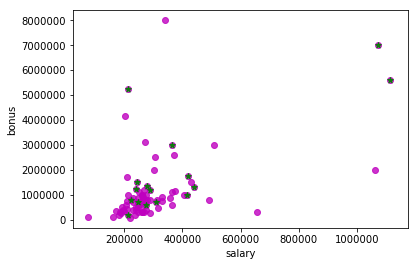

In [107]:
#plot original financial data
plt.figure(1)
plt.scatter(salary,bonus,c='m',alpha=0.8)
#visualize poi
for i,value in enumerate(poi):
    if (value==True):
        plt.scatter(salary[i],bonus[i],c='g',marker='*',alpha=0.9)
plt.xlabel('salary')
plt.ylabel('bonus')
plt.show()

In [109]:
#cluster data
from sklearn.cluster import KMeans
finance_features=zip(salary,bonus)
finance_features_c=[finance_features[i] for i in range(len(finance_features))\
                    if 'NaN' not in finance_features[i]]
kmeans=KMeans(n_clusters=3,max_iter=400,n_init=15).fit(finance_features_c)
pred=kmeans.labels_
print pred

[2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0
 0 0 0 2 0 0 0 2 0 0 1 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 1 0 0 0
 0 0 0 0 0 2 0]


[[201955, 267102, 239671, 231330, 213999, 187922, 213625, 248546, 278601, 248017, 261516, 330546, 240189, 261809, 415189, 288542, 314288, 184899, 206121, 365163, 492375, 210500, 250100, 262788, 221003, 278601, 210692, 182245, 170941, 304588, 440698, 199157, 1060932, 192008, 231946, 274975, 272880, 374125, 243293, 262663, 211788, 288558, 275101, 404338, 271442, 309946, 224305, 339288, 1072321, 273746, 236457, 263413, 365038, 370448, 365788, 267093, 251654, 229284, 329078, 261879, 655037, 197091, 76399, 420636, 249201, 304110, 269076, 248146, 211844, 428780, 1111258, 239502, 162779, 257486, 265214, 247338, 288589, 357091, 259996, 510364, 317543], [4175000, 1200000, 400000, 700000, 5249999, 250000, 1000000, 850000, 1350000, 500000, 750000, 900000, 1250000, 300000, 1000000, 1200000, 800000, 325000, 600000, 3000000, 800000, 425000, 600000, 1000000, 70000, 800000, 750000, 200000, 350000, 2500000, 1300000, 350000, 2000000, 509870, 850000, 600000, 750000, 1150000, 1500000, 700000, 1700000, 250

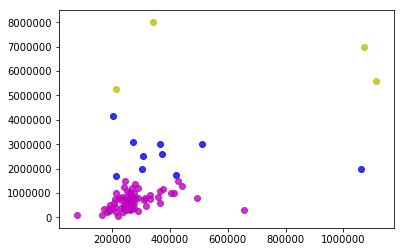

In [117]:
#visualize data after clustering
colors=['m','y','b']
finance_features_t=map(list,zip(*finance_features_c))
print finance_features_t

#use loop to seperate one class from another
plt.figure(2)
for i,value in enumerate(pred):
    plt.scatter(finance_features_t[0][i],finance_features_t[1][i],\
                color=colors[value],alpha=0.8)
plt.savefig('cluster_data.pdf')
plt.show()